In [1]:
import glob
from bs4 import BeautifulSoup as Soup

## Primer: urnik

##### Odgovor 9-2-1

Predmeti so navedeni v zapisih oblike:

    <a class="link-subject" href="?subject=63711" >AiPS1_LV</a>
    
Potrebno je torej iskati oznake `<a>` z atributom `class="link-subject"`.

In [2]:
urniki = {}

for fn in glob.glob('podatki/urnik/fri*/*.html'):
    _, _, semester, studentID = fn.split('/')
    studentID = studentID[:-5]
    with open(fn, 'rt') as fin:
        html_doc = fin.read()
    soup = Soup(html_doc, 'html.parser')
    
    subjects = set()
    for v in soup.find_all('a', class_='link-subject'):
        subject = v['href']
        if subject.startswith('?subject='):
            subject = subject.split('=')[1]
            subjects.add(subject)

    urniki.setdefault(studentID, {}).setdefault(semester, subjects)

##### Odgovor 9-2-2

In [3]:
predmeti = set()
for studentID, semesters in urniki.items():
    for subjects in semesters.values():
        predmeti.update(subjects)
predmeti.add(subject)
print(len(predmeti))

183


##### Odgovor 9-2-3

In [4]:
predmeti

{'6',
 '63001',
 '63202',
 '63203',
 '63204',
 '63205',
 '63207',
 '63208',
 '63209',
 '63212',
 '63213',
 '63214',
 '63215',
 '63216',
 '63217',
 '63218',
 '63219',
 '63220',
 '63221',
 '63222',
 '63223',
 '63224',
 '63225B',
 '63226',
 '63248',
 '63249',
 '63250',
 '63251',
 '63252',
 '63253',
 '63254',
 '63255',
 '63256',
 '63257',
 '63258',
 '63259',
 '63260',
 '63261',
 '63262',
 '63263',
 '63264',
 '63265',
 '63266',
 '63267',
 '63268',
 '63269',
 '63270',
 '63271',
 '63277',
 '63278',
 '63279',
 '63280',
 '63281',
 '63283',
 '63284',
 '63284A',
 '63284B',
 '63287',
 '63288',
 '63443',
 '63501',
 '63502',
 '63506',
 '63506A',
 '63507',
 '63507A',
 '63508',
 '63508A',
 '63509',
 '63509A',
 '63510',
 '63511',
 '63512',
 '63514',
 '63515',
 '63516',
 '63517',
 '63518',
 '63519',
 '63520',
 '63521',
 '63522',
 '63523',
 '63525',
 '63526',
 '63527',
 '63528',
 '63530',
 '63532',
 '63533',
 '63536B',
 '63541',
 '63542',
 '63543',
 '63545A',
 '63545B',
 '63546D',
 '63546E',
 '63546F',
 

Izpustili bi morda `6`, `7`, `FA0001`, `PISKOT`, `S1S3`, `VZD1`, ker so iz drugih študijskih programov.

##### Odgovor 9-2-4

Najprej naredimo tabelo, kjer vsaka vrstica je en študent, vsak stolpec je en predmet.
V celico zapišemo `1`, če študent (v vrstici) izbere predmet (v stoplcu).

In [5]:
data = []
students = []
predmeti = sorted(predmeti)
for studentID, semesters in urniki.items():
    vec = [0]*len(predmeti)
    for subjects in semesters.values():
        for subject in subjects:
            i = predmeti.index(subject)
            vec[i] = 1
    data.append(vec)
    students.append(studentID)

Shrani v datoteko `txt` v obliki za nalaganje v Orange.

In [6]:
import csv

with open('podatki/urnik/urnik.tab', 'wt') as fout:
    tabwriter = csv.writer(fout, delimiter='\t')
    tabwriter.writerow(['mS#studentID'] + [f"D#{x}" for x in predmeti])
    for sid, r in zip(students, data):
        tabwriter.writerow([sid] + r)

In [7]:
import scipy.cluster.hierarchy as sch
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt

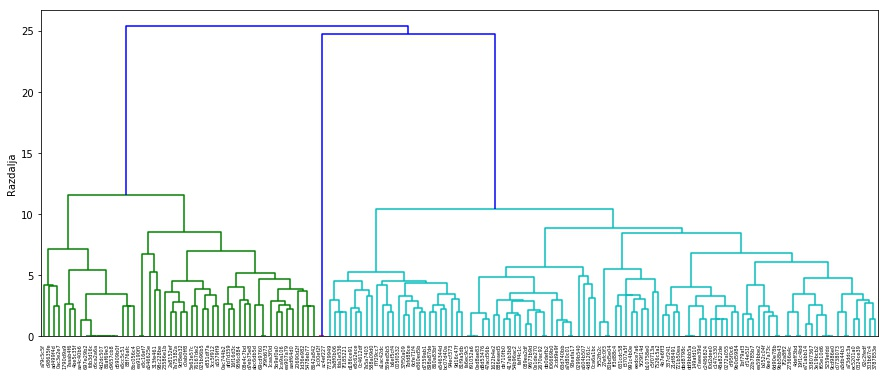

In [8]:
plt.figure(figsize=(15, 6))
H = sch.linkage(data, method='ward')
D = sch.dendrogram(H, labels=students, leaf_rotation=90, orientation='top')
plt.ylabel("Razdalja")
plt.savefig('slike/urnik_dendrogram.png')

##### Odgovor 9-2-5

Izbrati je potrebno predvsem tiste predmete, ki so dejansko izbirni oz. niso prisotni pri vseh (večini) študentov.